In [6]:
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\tanxe\\Programming\\ML\\WORK\\classifier\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])
filtered_df = df
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Stock' or x == 'Finance' else 0)
df_cleaned = filtered_df.dropna(subset=['content'])
balanced_df = df_cleaned
balanced_df

# filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

# filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
# df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
# df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
# df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
# balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)

,article_id,source_name,title,description,content,category,full_content,relevant
0,89541,International Business Times,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,0
1,89542,Prtimes.jp,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,0
2,89543,VOA News,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,0
3,89545,The Indian Express,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,0
4,89547,The Times of Israel,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",Nepal,NaN,0
...,...,...,...,...,...,...,...,...
105370,781108,The Indian Express,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,0
105371,781129,Forbes,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,0
105372,781235,NPR,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,0
105373,781240,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,0


In [7]:
balanced_df_24k = balanced_df[balanced_df['source_name'].isin(["ETF Daily News", "The Times of India"])]
balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)
balanced_df_24k = balanced_df_24k.dropna(subset=['content'])
balanced_df_24k['relevant'].value_counts()

C:\Users\tanxe\AppData\Local\Temp\ipykernel_2056\2424080986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)


relevant
0    20757
1     3503
Name: count, dtype: int64

Incorporating NER

In [3]:
import spacy

In [4]:
# !python -m spacy download en_core_web_lg

In [5]:
text = balanced_df['full_content'][0]
nlp = spacy.load('en_core_web_lg')
# nlp = spacy.load('en_core_web_trf') may be better in the office

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

In [6]:
text = balanced_df['full_content'][0]
nlp = spacy.load('en_core_web_lg')

In [7]:
doc = nlp(text)
for ent in doc.ents:
    print(ent, ent.label_)

UN ORG
Antonio Guterres PERSON
Monday DATE
Himalayan NORP
Guterres PERSON
Everest LOC
Nepal GPE
nearly a third CARDINAL
just over three decades DATE
Himalayas LOC
Nepal GPE
65 percent PERCENT
the last decade DATE
Guterres PERSON
four-day DATE
Nepal GPE
Himalayan NORP
Hindu NORP
around 240 million CARDINAL
1.65 billion CARDINAL
South Asian NORP
Southeast Asian NORP
10 CARDINAL
Ganges NORP
Indus GPE
Yellow GPE
Mekong GPE
Irrawaddy GPE
billions CARDINAL
today DATE
Guterres PERSON
Syangboche village GPE
Everest LOC
nearly 1.2 degrees Celsius QUANTITY
the mid-1800s DATE
1.5 degrees QUANTITY
Guterres PERSON
first ORDINAL
Himalayan NORP
Indus GPE
Ganges ORG
Brahmaputra ORG


Adding a seperate column for the entities

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    entities_plus_labels = [f"{ent}_{ent.label}" for ent in doc.ents]
    return " ".join(entities_plus_labels)


balanced_df_24k['entities'] = balanced_df_24k['content'].apply(extract_entities)
balanced_df_24k['entities']

In [ ]:
balanced_df_24k[balanced_df_24k['relevant'] == 1]

,article_id,source_name,title,description,content,category,full_content,relevant,entities
3109,94343,The Times of India,These 9 commodity stocks hit 52-week high on T...,"During Thursday's trading session, the Sensex ...","Nov 02, 2023, 07:22:41 PM IST\nDuring Thursday...",Stock,NaN,1,Nov 02_391 2023_391 07:22:41 PM_392 Thursday_3...
57910,133924,The Times of India,Fundamental Radar: Varun Beverages poised to b...,Varun Beverages Ltd is the second-largest fran...,SynopsisVarun Beverages Ltd is the second-larg...,Stock,NaN,1,SynopsisVarun Beverages Ltd_383 second_396 Pep...
57935,134021,The Times of India,Stock market update: Mining stocks up as marke...,The 30-share BSE Sensex was up 425.32 points...,NEW DELHI: Mining stocks were trading higher o...,Stock,Getty Images Nifty moved in a tight range of 8...,1,NEW DELHI_384 Friday_391 10:09AM_397 Oriental_...
57936,134022,The Times of India,Stock market update: Fertilisers stocks up as ...,The 30-share BSE Sensex was up 441.31 points...,NEW DELHI: Fertilisers stocks were trading hig...,Stock,Getty Images NEW DELHI: Fertilisers stocks wer...,1,NEW DELHI_384 Fertilisers_380 Friday_391 Bohra...
57937,134023,The Times of India,InterGlobe stock price up 0.08 per cent as Sen...,"As of 30-Sep-2023, promoters held 38.02 per ce...",Shares of InterGlobe Aviation Ltd. rose 0.08 p...,Stock,"Reuters On an immediate basis, 15,770/52,500 a...",1,InterGlobe Aviation Ltd._383 0.08 per cent_394...
...,...,...,...,...,...,...,...,...,...
102076,693939,ETF Daily News,Universal (NYSE:UVV) vs. British American Toba...,Universal (NYSE:UVV – Get Free Report) and Bri...,Universal (NYSE:UVV – Get Free Report) and Bri...,Stock,Universal (NYSE:UVV–Get Free Report) and Briti...,1,NYSE_383 UVV_383 British American Tobacco_383
102077,693944,The Times of India,Do we have enough retail money in debt markets?,"​​For example, as per the monthly data release...","Generally, the retail investors are late to th...",Stock,IANS INSIGHTS \n \t Rea...,1,
102078,693947,The Times of India,"FII action, OPEC+ meet among top 10 factors to...",Meena expects the market to experience some di...,Indian frontline indices S&amp;P BSE Sensex an...,Stock,ETMarkets.com Indian frontline indices S&P BSE...,1,Indian_381 BSE Sensex_383 Nifty50_383 Friday_3...
102079,693954,The Times of India,"For workers at this iPhone plant, Tata means a...","At the Narasapura facility, the recent takeove...","It is the Tata tag we aim for, who doesnt want...",Stock,"“It is the Tata tag we aim for, who doesn’t ...",1,Tata_383 Tata_383 iPhone_383 Narasapura_384 Ka...


In [8]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(balanced_df_24k, test_size=0.4, random_state=42, stratify=balanced_df_24k['relevant'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['relevant'])

train_df['relevant'].value_counts()

relevant
0    12454
1     2102
Name: count, dtype: int64

In [3]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Weighted XLNet

In [10]:
print(torch.cuda.is_available())  # This should return True if CUDA is available 

True


In [ ]:
# %pip install transformers torch

### Weighted XLNet

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import XLNetForSequenceClassification


# Load the tokenizer and model
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        encoding = self.tokenizer(
            row['content'], # Replace 'content' with 'article_content' if working with real data
            truncation=True, 
            padding='max_length', 
            max_length=self.max_length, 
            return_tensors='pt' #  return the output in the form of PyTorch tensors
            )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float), # for BCEWithLogitsLoss use float
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=128)
val_dataset = TextDataset(val_df, tokenizer, max_length=128)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# load the XLNet model
XLNet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=1)
XLNet_model.to(device)

# load from checkpoint
checkpoint = torch.load('best_XLNet_model_epoch_3_BCEWithLogitsLoss.pt')
XLNet_model.load_state_dict(checkpoint['model_state_dict'])

# Loss function and optimizer
# loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)
optimizer = AdamW(XLNet_model.parameters(), lr=2e-5)

# Training loop
num_epochs = 20
current_epoch = 5
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs):
    print(f"Epoch {epoch}/{num_epochs}")
    XLNet_model.train() #switch to training mode
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad() # Clear old gradients
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }

        outputs = XLNet_model(**inputs)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader) # average training loss
    print(f"Training Loss: {train_loss:.4f}")

    # Validation
    XLNet_model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = XLNet_model(**inputs)
            val_loss += outputs.loss.item()
            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # threshold = 0.5 for  now
            val_preds.extend(preds)           
            val_labels.extend(inputs['labels'].cpu().numpy())
            
    val_loss /= len(val_dataloader) # average validation loss
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))

    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
        'epoch': epoch,
        'model_state_dict': XLNet_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, f"best_XLNet_model_epoch_{epoch}_BCEWithLogitsLoss.pt")

print("Training complete!")

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use th

Epoch 5/20
  Batch 10/910 - Loss: 0.0533
  Batch 20/910 - Loss: 0.0889
  Batch 30/910 - Loss: 0.1251
  Batch 40/910 - Loss: 0.0281
  Batch 50/910 - Loss: 0.1214
  Batch 60/910 - Loss: 0.1508
  Batch 70/910 - Loss: 0.0908
  Batch 80/910 - Loss: 0.1146
  Batch 90/910 - Loss: 0.0708
  Batch 100/910 - Loss: 0.0452
  Batch 110/910 - Loss: 0.1092
  Batch 120/910 - Loss: 0.0251
  Batch 130/910 - Loss: 0.0380
  Batch 140/910 - Loss: 0.0845
  Batch 150/910 - Loss: 0.0900
  Batch 160/910 - Loss: 0.1914
  Batch 170/910 - Loss: 0.1182
  Batch 180/910 - Loss: 0.0841
  Batch 190/910 - Loss: 0.0364
  Batch 200/910 - Loss: 0.0855
  Batch 210/910 - Loss: 0.1513
  Batch 220/910 - Loss: 0.0954
  Batch 230/910 - Loss: 0.1615
  Batch 240/910 - Loss: 0.1022
  Batch 250/910 - Loss: 0.0980
  Batch 260/910 - Loss: 0.1054
  Batch 270/910 - Loss: 0.0334
  Batch 280/910 - Loss: 0.0500
  Batch 290/910 - Loss: 0.1918
  Batch 300/910 - Loss: 0.0776
  Batch 310/910 - Loss: 0.0527
  Batch 320/910 - Loss: 0.0809
  Batc

KeyboardInterrupt: 

### Weighted XLNet
incorporating entities

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau  

# Load the tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        encoding = self.tokenizer(
            row['title'], row['content'], row['entities'], # Replace 'content' with 'article_content' if working with real data
            add_special_tokens=True,
            truncation=True, 
            padding='max_length', 
            max_length=self.max_length, 
            return_tensors='pt' #  return the output in the form of PyTorch tensors
            )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float), # for BCEWithLogitsLoss use float
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=256)
val_dataset = TextDataset(val_df, tokenizer, max_length=256)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# load the XLNet model
XLNet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=1)
XLNet_model.to(device)

# load from checkpoint
# checkpoint = torch.load('best_XLNet_model_epoch_3_BCEWithLogitsLoss.pt')
# XLNet_model.load_state_dict(checkpoint['model_state_dict'])

# Loss function and optimizer
# loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)
optimizer = AdamW(XLNet_model.parameters(), lr=2e-5)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.2, verbose=True)

# Training loop
num_epochs = 20
current_epoch = 1
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")
    XLNet_model.train() #switch to training mode
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad() # Clear old gradients
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }

        outputs = XLNet_model(**inputs)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader) # average training loss
    print(f"Training Loss: {train_loss:.4f}")

    # Validation
    XLNet_model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = XLNet_model(**inputs)
            val_loss += outputs.loss.item()
            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # threshold = 0.5 for  now
            val_preds.extend(preds)           
            val_labels.extend(inputs['labels'].cpu().numpy())
            
    val_loss /= len(val_dataloader) # average validation loss
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))
    # step the scheduler
    scheduler.step(val_loss)

    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
        'epoch': epoch,
        'model_state_dict': XLNet_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, f"best_XLNet_model_epoch_{epoch}_BCEWithLogitsLoss.pt")


print("Training complete!")

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

NameError: name 'Dataset' is not defined

### Weighted XLNet
Only trained on the entities

In [12]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification
import torch
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau  

# Load the tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        encoding = self.tokenizer(
            row['entities'], # Replace 'content' with 'article_content' if working with real data
            add_special_tokens=True,
            truncation=True, 
            padding='max_length', 
            max_length=self.max_length, 
            return_tensors='pt' #  return the output in the form of PyTorch tensors
            )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float), # for BCEWithLogitsLoss use float
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=256)
val_dataset = TextDataset(val_df, tokenizer, max_length=256)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# load the XLNet model
XLNet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=1)
XLNet_model.to(device)

# load from checkpoint
# checkpoint = torch.load('best_XLNet_model_epoch_3_BCEWithLogitsLoss.pt')
# XLNet_model.load_state_dict(checkpoint['model_state_dict'])

# Loss function and optimizer
# loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor)
optimizer = AdamW(XLNet_model.parameters(), lr=2e-5)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.2, verbose=True)

# Training loop
num_epochs = 20
current_epoch = 1
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")
    XLNet_model.train() #switch to training mode
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad() # Clear old gradients
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }

        outputs = XLNet_model(**inputs)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader) # average training loss
    print(f"Training Loss: {train_loss:.4f}")

    # Validation
    XLNet_model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = XLNet_model(**inputs)
            val_loss += outputs.loss.item()
            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # threshold = 0.5 for  now
            val_preds.extend(preds)           
            val_labels.extend(inputs['labels'].cpu().numpy())
            
    val_loss /= len(val_dataloader) # average validation loss
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))
    # step the scheduler
    scheduler.step(val_loss)

    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
        'epoch': epoch,
        'model_state_dict': XLNet_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, f"best_XLNet_model_epoch_{epoch}_BCEWithLogitsLoss.pt")


print("Training complete!")

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20


KeyError: 'entities'

### Focal loss

In [9]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from transformers import XLNetTokenizer, XLNetForSequenceClassification
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau  

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        encoding = self.tokenizer(
            # Replace 'content' with 'article_content' if working with real data
            # Replace 'title' with 'source' too
            row['title'], row['content'], 
            add_special_tokens=True,
            truncation=True, 
            padding='max_length', 
            max_length=self.max_length, 
            return_tensors='pt' #  return the output in the form of PyTorch tensors
            )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['relevant'], dtype=torch.float), # for BCEWithLogitsLoss use float
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=256)
val_dataset = TextDataset(val_df, tokenizer, max_length=256)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# load the XLNet model
XLNet_model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased", num_labels=1)
XLNet_model.to(device)

# Define a Focal Loss class
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=1, gamma=2):
        # Note: When building custom loss functions that modify existing 
        # ones, it's common practice to use the functional versions as building blocks, then
        # wrap them in a class that inherits from nn.Module
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        
    def forward(self, inputs, targets):
        # Using the functional version of BCEWithLogitsLoss so that we can get the unreduced
        # losses (for the Hadamard product)
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        
        # Apply sigmoid to get probabilities
        probs = torch.sigmoid(inputs)
        # For targets=1, we use p, for targets=0, we use 1-p
        pt = probs * targets + (1 - probs) * (1 - targets)
        
        # Focusing term
        focal_weight = (1 - pt).pow(self.gamma)
        
        # Apply alpha weighting
        if self.alpha is not None:
            # Alpha for positive samples, 1-alpha for negative samples
            alpha_weight = self.alpha * targets + (1 - self.alpha) * (1 - targets)
            focal_weight = focal_weight * alpha_weight
            
        # Compute the loss using Hadamard Product
        focal_loss = focal_weight * bce_loss
        
        # Apply reduction
        return torch.mean(focal_loss)

# Compute a reasonable alpha from class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['relevant']), y=train_df['relevant'])
alpha = class_weights[1]  / (class_weights[0] + class_weights[1] )  # Normalize to get alpha between 0 and 1

# Initialize focal loss and set up the optimizer
loss_fn = FocalLoss(alpha=alpha, gamma=2)  # gamma=2 is a common default value
optimizer = AdamW(XLNet_model.parameters(), lr=2e-5)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.2, verbose=True)

# Training loop
num_epochs = 20
current_epoch = 1
best_val_loss = float('inf')

for epoch in range(current_epoch, num_epochs + 1):
    print(f"Epoch {epoch}/{num_epochs}")
    XLNet_model.train()  # Switch to training mode
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad() # Clear old gradients
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device)
        }

        labels = batch['labels'].to(device)
        outputs = XLNet_model(**inputs)
        logits = outputs.logits.squeeze(-1)
        loss = loss_fn(logits, labels)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader) # average training loss
    print(f"Training Loss: {train_loss:.4f}")
    
    # Validation
    XLNet_model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
            }
            labels = batch['labels'].to(device)
            outputs = XLNet_model(**inputs)
            logits = outputs.logits.squeeze(-1)
            val_loss += loss_fn(logits, labels).item()
            preds = torch.sigmoid(logits).cpu().numpy() > 0.5  # threshold = 0.5 for  now
            val_preds.extend(preds)           
            val_labels.extend(batch['labels'].cpu().numpy())
            
    val_loss /= len(val_dataloader) # average validation loss
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))
    # step the scheduler
    scheduler.step(val_loss)
    
    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': XLNet_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_loss': best_val_loss
        }, f"best_XLNet_model_epoch_{epoch}_FocalLoss_gamma{loss_fn.gamma}_alpha{loss_fn.alpha:.2f}.pt")

print("Training complete!")

c:\Users\tanxe\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
  Batch 10/910 - Loss: 0.0712
  Batch 20/910 - Loss: 0.0379
  Batch 30/910 - Loss: 0.0192
  Batch 40/910 - Loss: 0.0212
  Batch 50/910 - Loss: 0.0293
  Batch 60/910 - Loss: 0.0337
  Batch 70/910 - Loss: 0.0375
  Batch 80/910 - Loss: 0.0245
  Batch 90/910 - Loss: 0.0321
  Batch 100/910 - Loss: 0.0341
  Batch 110/910 - Loss: 0.0362
  Batch 120/910 - Loss: 0.0137
  Batch 130/910 - Loss: 0.0322
  Batch 140/910 - Loss: 0.0434
  Batch 150/910 - Loss: 0.0263
  Batch 160/910 - Loss: 0.0209
  Batch 170/910 - Loss: 0.0440
  Batch 180/910 - Loss: 0.0833
  Batch 190/910 - Loss: 0.0310
  Batch 200/910 - Loss: 0.0259
  Batch 210/910 - Loss: 0.0071
  Batch 220/910 - Loss: 0.0323
  Batch 230/910 - Loss: 0.0218
  Batch 240/910 - Loss: 0.0324
  Batch 250/910 - Loss: 0.0277
  Batch 260/910 - Loss: 0.0429
  Batch 270/910 - Loss: 0.0243
  Batch 280/910 - Loss: 0.0460
  Batch 290/910 - Loss: 0.0368
  Batch 300/910 - Loss: 0.0274
  Batch 310/910 - Loss: 0.0572
  Batch 320/910 - Loss: 0.0210
  Batc

KeyboardInterrupt: 

### Model evaluation

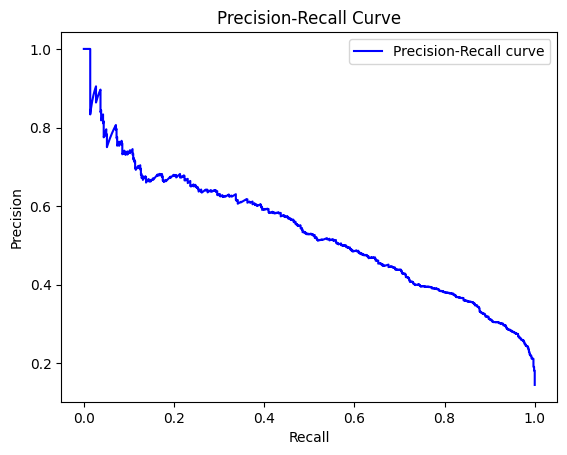

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

XLNet_model.eval()
y_probs, y_true = [], []
with torch.no_grad():
    for batch in val_dataloader:
        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }
        outputs = XLNet_model(**inputs)
        val_loss += outputs.loss.item()

        logits = outputs.logits
        preds = torch.sigmoid(logits).cpu().numpy()
        y_probs.extend(preds)
        y_true.extend(inputs['labels'].cpu().numpy())

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs)

# Plot precision-recall curve
plt.plot(recall, precision, color='b', label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# Compute F1 scores 
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])


### Checking the performance with different threshold values

In [ ]:
test_dataset = TextDataset(test_df, tokenizer, max_length=128)
test_dataloader = DataLoader(test_dataset, batch_size=16)
XLNet_model.eval()
y_preds, y_true = [], []
with torch.no_grad():
        for batch in test_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = XLNet_model(**inputs)

            logits = outputs.logits
            preds = torch.sigmoid(logits).cpu().numpy() > 0.55 # testing threshold = 0.65 for now
            y_preds.extend(preds)
            y_true.extend(inputs['labels'].cpu().numpy())

In [ ]:
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      4158
         1.0       0.58      0.52      0.55       694

    accuracy                           0.88      4852
   macro avg       0.75      0.73      0.74      4852
weighted avg       0.87      0.88      0.87      4852

